<a href="https://colab.research.google.com/github/XiadaniCue/Simulaci-n-1/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sistema de Investarios**
La demanda mensual de un cierto producto sigue la siguente distribución de probabilidad empírica:

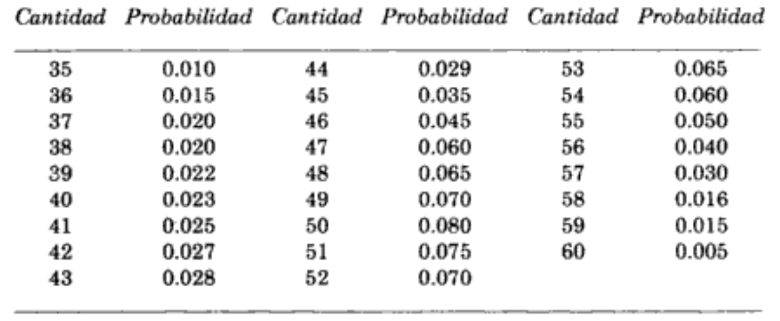

El tiempo de entrega esta distribuido de acuerdo a la siguiente distribución:

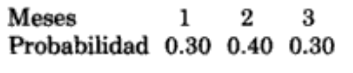

Los factores estacionales para cada uno de los meses del año son como se muestran a conntinoación:

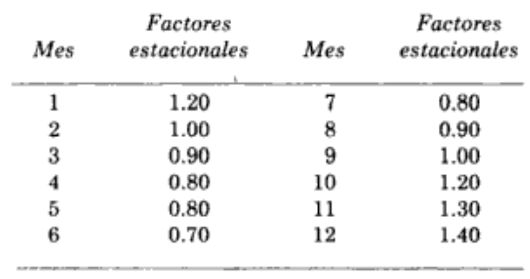

La información con respecto a los costos relevantes son los siguientes:

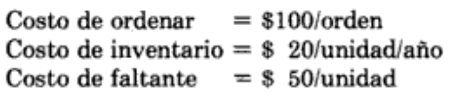

Si el inventario inicial se asume de 150 unidades de dicho producto. ¿Determinar la cantidad optima para ordenar?

**Solución**

Para simular nuestra tabla, ocuparemos los valores: $q=200~(Resurtido)~y~R=100~(minímo~de~inventario)$

Se ocupa el metodo de transformada inversa para calcular la siguiente tabla:

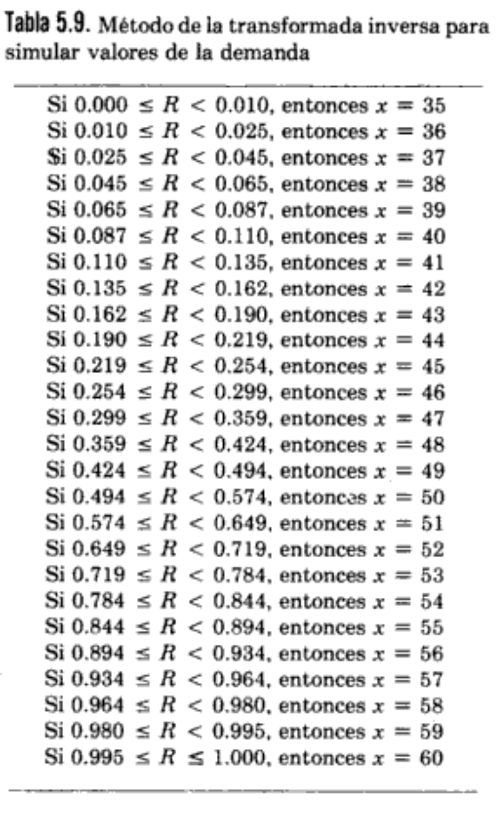

In [15]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display
import pandas as pd

In [16]:
inv_ini=150 #Valor inicial de nuestro inventario
Resurtir=100 #Valor minímo para resurtir
fac_est=[1.2, 1.0, 0.90, 0.80, 0.80, 0.70, 0.80, 0.90, 1.00, 1.20, 1.30, 1.40,] #Factores estacionarios por mes

In [17]:
#Generamos listas vacias
mes=[] #Indica el mes en el que estamos.
INV_INI = [] #Lista donde se guardará los datos del inventario por mes
Inv_ini=[]  # Lista auxiliar para los valores iniciales del inventario
Num_Ale=[] #Lista donde se guardará el valor de x
Dem_Ajus=[] #Lista donde se guarda el valor de x multiplicado por el factor estacionario del mes acorde
Inv_Fin=[] #Lista donde se guardará el valor de los productos restantes por mes
Falt=[] # Lista donde se guardará el valor de los prodcutos faltantes por mes
Num_Orden=[] # Lista donde se guardará el valor de la posición de levantar una orden
Inv_Mes_Prom=[] # Lista donde se guardará el valor promedio del inventario por mes
num_mes=12 # La cantidad de meses que queremos simular
orden = (4+num_mes)*[0] #Lista que nos ayudará a agregar el resurtido adecuadamente
co = 0 # Un contador
j=0 # Un contador para la alza de orden

for i in range (0,num_mes): #Un ciclo para simular el proceso n veces
  u= rnd.random() #Generamos un número aleatorio (N(0,1)) para indicar la cantidad de pedios
  R = rnd.random() #Generamos un número aleatorio (N(0,1))para indicar en cuántos meses nos llegará el resurtido

  fac_est_index = i % len(fac_est)# Ajustar índice de fac_est usando módulo

  #Condiciones de la transformada inversa.(Tabla). Dado cierto valor de u, nos devuelve un valor x
  if 0<= u < 0.010:
    x=35
  elif 0.010<= u < 0.025:
    x=36
  elif 0.025<= u < 0.045:
    x=37
  elif 0.045<= u < 0.065:
    x=38
  elif 0.065<= u < 0.087:
    x=39
  elif 0.087<= u < 0.110:
    x=40
  elif 0.110<= u < 0.135:
    x=41
  elif 0.135<= u < 0.162:
    x=42
  elif 0.162<= u < 0.190:
    x=43
  elif 0.190<= u < 0.219:
    x=44
  elif 0.219<= u < 0.254:
    x=45
  elif 0.254<= u < 0.299:
    x=46
  elif 0.299<= u < 0.359:
    x=47
  elif 0.359<= u < 0.424:
    x=48
  elif 0.424<= u < 0.494:
    x=49
  elif 0.494<= u < 0.574:
    x=50
  elif 0.574<= u < 0.649:
    x=51
  elif 0.649<= u < 0.719:
    x=52
  elif 0.719<= u < 0.784:
    x=53
  elif 0.784<= u < 0.844:
    x=54
  elif 0.844<= u < 0.894:
    x=55
  elif 0.894<= u < 0.934:
    x=56
  elif 0.934<= u < 0.964:
    x=57
  elif 0.964<= u < 0.980:
    x=58
  elif 0.980<= u < 0.995:
    x=59
  elif 0.995<= u < 1.000:
    x=60

  mes.append(i+1) #Agregamos el número de mes
  Inv_ini.append(inv_ini) #Agregamos el valor inicial del inventario (150)
  Num_Ale.append(x) #Agremos el valor de x dado el número aletorio que salió

  Dem_Ajus.append(round(x * fac_est[fac_est_index])) #Agregamos el valor de x multiplicado por el factor estacionario del mes acorde. Eso es la demanda ajustada
  INV_INI.append(Inv_ini[i] + orden[i])  # Calcular INV_INI como Inv_ini + orden, esta es nuestra lista del inventario
  Inv_Fin.append(INV_INI[i] - Dem_Ajus[i])  # Calcular Inv_Fin como Inv_ini - Dem_Ajus

  if orden[i]==200: #Una condición que nos ayuda a resurtir adecuadamente
    co = 0
  if Inv_Fin[i]<Resurtir and co==0: # La condición para resurtir
    j+=1 # El contador para saber cuántas veces se levanta pedido
    Num_Orden.append(j) #Agregamos el número de la orden
    co += 1#Condiciones para saber en cuántos mes nos resurtirán

    # En cada caso se resurtirá 200 piezas, pero en distinto mes
    if 0 <= R < 0.30:
      y=2
      inv_ini=Inv_Fin[i]
      orden[i+y] = 200
    elif 0.30<= R < 0.70:
      y=3
      inv_ini=Inv_Fin[i]
      orden[i+y] = 200
    elif 0.70<= R < 1:
      y=4
      inv_ini=Inv_Fin[i]
      orden[i+y] = 200
  else:
    Num_Orden.append(0) # Si no se cumple con la condición del resurtimiento, se agrega 0
    inv_ini=Inv_Fin[i] # Asignamos el valor final a una variable para que se guarde en la lista de inventario inicial
  Inv_Mes_Prom.append(round((INV_INI[i]+Inv_Fin[i])/2)) # Se calcula el promedio del inventario mensual
  if Inv_Fin[i] < 0: # Esta condición nos ayuda a saber si tenemos faltante de inventario en el mes
    Falt.append(Dem_Ajus[i] - INV_INI[i]) #Calculamos el faltante
    Inv_Mes_Prom[i]=(abs(round((INV_INI[i]/2)*(INV_INI[i]/Dem_Ajus[i])))) #Calculamos el promedio del inventario mensual en el caso de tener faltante (la fórmula la dio el libro)
    Inv_Fin[i]=0 # Como hay faltante, ya no hay en inventario al final del mes. Por lo que es 0
  else:
    Falt.append(0) # En caso de no tener faltante, se agrega 0




In [18]:
#Hacemos nuestra tabla

#Escribimos el contenido de la tabla
tabla=pd.DataFrame((list(zip(mes, INV_INI,  Num_Ale, Dem_Ajus, Inv_Fin, Falt, Num_Orden, Inv_Mes_Prom))), columns=["Mes", "Inventario inicial",  "Número aleatorio",  "Demanda ajustada",  "Inventario final", "Faltante", "Orden", "Inventario mensual promedio"])

#Imprimimos la tabla y le damos formato
dataframe = pd.DataFrame(tabla)
display(dataframe)


,Mes,Inventario inicial,Número aleatorio,Demanda ajustada,Inventario final,Faltante,Orden,Inventario mensual promedio
0,1,150,50,60,90,0,1,120
1,2,90,53,53,37,0,0,64
2,3,37,53,48,0,11,0,14
3,4,189,51,41,148,0,0,168
4,5,148,55,44,104,0,0,126
5,6,104,44,31,73,0,2,88
6,7,73,41,33,40,0,0,56
7,8,40,53,48,0,8,0,17
8,9,-8,47,47,0,55,0,1
9,10,145,54,65,80,0,3,112


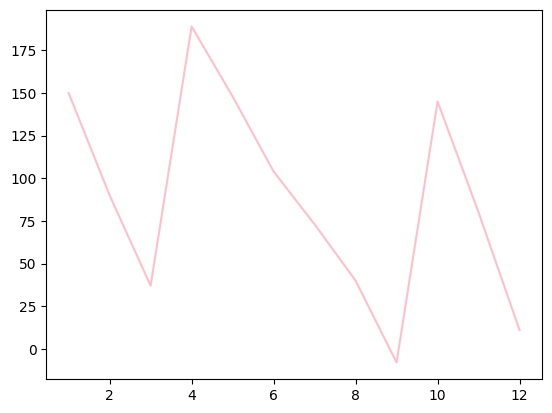

In [19]:
#Generamos nuestra gràfica

fig, ax = plt.subplots()
ax.plot(mes, INV_INI, color="pink")
plt.show()

# Calcular costos anuales del sistema de inventario

De acuerdo al ejercicio, cuesta $\$100$ ordenar por ocasión, el costo de faltante es $\$50$ por equipo y el costo por llevar inventario es $\$1.67$ por unidad y el costo total  es la suma.

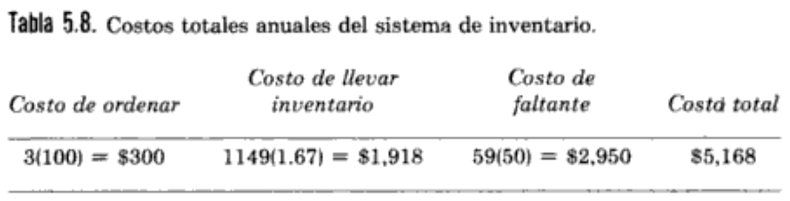

In [20]:
Costo_inv=sum(Inv_Mes_Prom)*1.67 #Calcula el costo de administrar el inventario
Costo_faltante=sum(Falt)*50 #Calcula el costo de tener faltante en el inventario (pérdida de oportunidad)
Costo_ordenar=(j)*100 #Calcula el costo que tiene ordenar un resurtir

Costo_total = Costo_inv + Costo_faltante + Costo_ordenar #La suma de los costos anteriores nos da el costo final

In [21]:
#Imprimos cada costo para ver el resultado
print("El costo de ordenar es: ", Costo_ordenar)
print("El costo de faltante es: ", Costo_faltante)
print("El costo de inventario es: ", Costo_inv)
print("El costo total del sistema de inventario es: ", Costo_total)

El costo de ordenar es:  300
El costo de faltante es:  6600
El costo de inventario es:  1357.71
El costo total del sistema de inventario es:  8257.71
